/tmp/ipython-input-4019416976.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



🎯 Acurácia: 0.7988826815642458

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



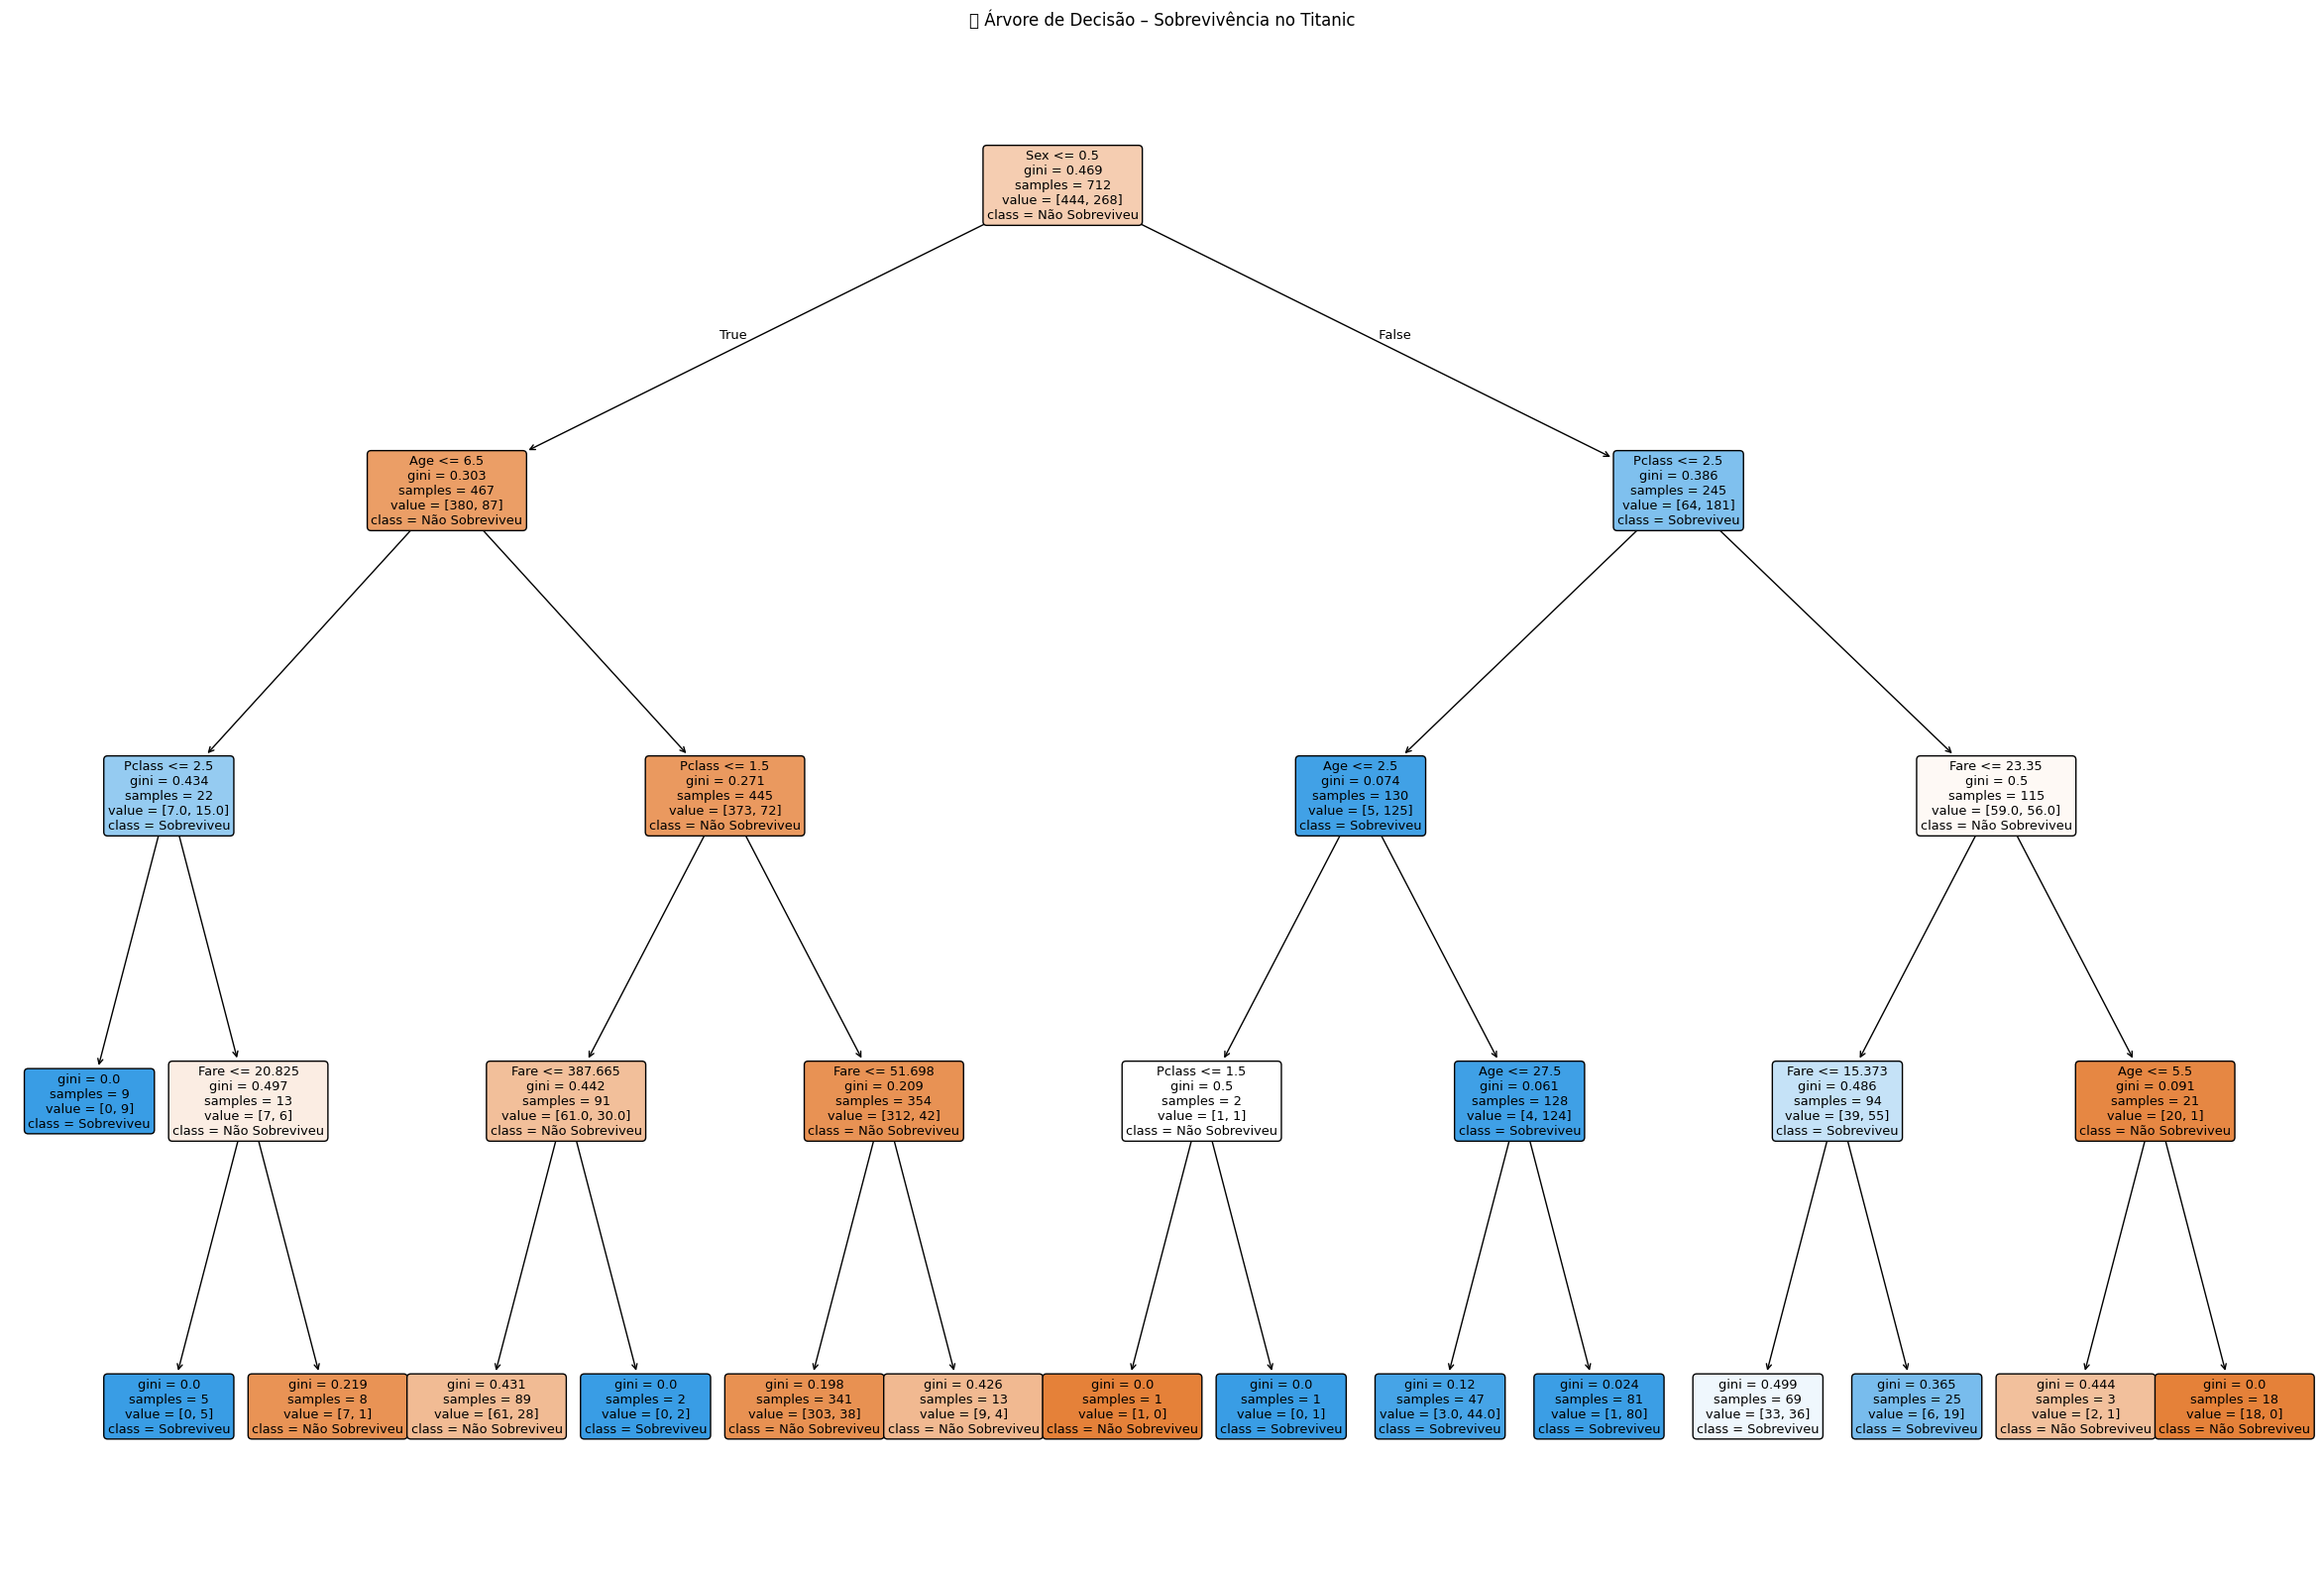

In [ ]:
### 🧪 Kit Prático – Semana 10: Classificação com Árvore de Decisão
# Tema: Modelo interpretável e visualização de decisões
# Ferramenta: Google Colab
# Dataset: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Passo 1: Carregar os dados
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Passo 2: Preparar os dados
df_model = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)
df_model['Sex'] = df_model['Sex'].map({'male': 0, 'female': 1})

X = df_model[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_model['Survived']

# Passo 3: Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arvore.fit(X_train, y_train)

# Passo 5: Avaliar o modelo
y_pred = modelo_arvore.predict(X_test)
print("\n Acurácia:", accuracy_score(y_test, y_pred))
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Passo 6: Visualizar a árvore
display_labels = ['Não Sobreviveu', 'Sobreviveu']
plt.figure(figsize=(30,20))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=display_labels, filled=True, rounded=True)
plt.title("🌳 Árvore de Decisão – Sobrevivência no Titanic")
plt.show()

# DESAFIO EXTRA:
# Testar diferentes valores de "max_depth" e observar o impacto na acurácia e na complexidade da árvore.


In [ ]:
acuracias = []
depths = range(2, 11)

for depth in depths:
    modelo_teste = DecisionTreeClassifier(max_depth=depth, random_state=42)
    modelo_teste.fit(X_train, y_train)
    
    y_pred_teste = modelo_teste.predict(X_test)
    acc = accuracy_score(y_test, y_pred_teste)
    acuracias.append(acc)
    
    print(f"Profundidade (max_depth): {depth:2d} | Acurácia: {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, acuracias, marker='o', linestyle='--')
plt.title('📈 Impacto do max_depth na Acurácia do Modelo')
plt.xlabel('Profundidade Máxima da Árvore (max_depth)')
plt.ylabel('Acurácia no Conjunto de Teste')
plt.xticks(depths)
plt.grid(True)
plt.show()